In [1]:
import numpy as np
import pickle
import json
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,GlobalAveragePooling1D
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
with open('intent.json','r') as file:
    data=json.load(file)

In [3]:
training_data=[]
target_labels=[]
responses=[]
labels=[]
for i in data['intents']:
    for j in i['patterns']:
        training_data.append(j)
        target_labels.append(i['tag'])
    responses.append(i['responses'])
    if i['tag'] not in labels:
        labels.append(i['tag'])
        
classes=len(labels)
classes

17

In [4]:
# convert target_labels into model understable form
lbl=LabelEncoder()
lbl.fit(target_labels)
target_labels=lbl.transform(target_labels)
target_labels

array([ 4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5, 14, 14,
       14,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2, 16,
       16, 16, 16,  7,  7,  7,  7,  7, 15, 15, 15, 15, 15, 15, 15,  8,  8,
        8,  8,  8,  8,  8, 13, 13, 13, 13, 13, 12, 12, 12, 11, 11, 11, 11,
       11, 11,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,  0,  0,  0,  0,
        0,  0,  3,  3,  3,  3,  3,  3,  6,  6,  6,  6,  6,  6],
      dtype=int64)

In [11]:
# preprocessing of text
vocab=10000
leng=20
Epochs=500

tokenizer = Tokenizer()
tokenizer.fit_on_texts(training_data)
sequence = tokenizer.texts_to_sequences(training_data)
pad_sequence = pad_sequences(sequence, maxlen=leng, truncating='post')
pad_sequence

array([[  0,   0,   0, ...,   0,   0,  33],
       [  0,   0,   0, ...,   0,  33,  17],
       [  0,   0,   0, ...,   3,  64,  17],
       ...,
       [  0,   0,   0, ...,   5,   6,  50],
       [  0,   0,   0, ...,  98,   5,  99],
       [  0,   0,   0, ...,  31, 100,  62]])

In [12]:
# define neural networks
model=Sequential()
model.add(Embedding(vocab,64,input_length=leng))
model.add(GlobalAveragePooling1D())
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation="relu"))

model.add(Dense(classes,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 64)            640000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 17)                289       
Total params: 641,601
Trainable params: 641,601
Non-trainable params: 0
_________________________________________________________________


In [13]:
H = model.fit(pad_sequence,np.array(target_labels),epochs=500)

Epoch 1/500
4/4 [==============================] - 1s 12ms/step - loss: 2.8337 - accuracy: 0.0808
Epoch 2/500
4/4 [==============================] - 0s 13ms/step - loss: 2.8310 - accuracy: 0.0707
Epoch 3/500
4/4 [==============================] - 0s 13ms/step - loss: 2.8297 - accuracy: 0.0707
Epoch 4/500
4/4 [==============================] - 0s 13ms/step - loss: 2.8273 - accuracy: 0.0707
Epoch 5/500
4/4 [==============================] - 0s 14ms/step - loss: 2.8259 - accuracy: 0.0707
Epoch 6/500
4/4 [==============================] - 0s 16ms/step - loss: 2.8244 - accuracy: 0.0808
Epoch 7/500
4/4 [==============================] - 0s 17ms/step - loss: 2.8225 - accuracy: 0.0808
Epoch 8/500
4/4 [==============================] - 0s 14ms/step - loss: 2.8205 - accuracy: 0.0808
Epoch 9/500
4/4 [==============================] - 0s 14ms/step - loss: 2.8189 - accuracy: 0.0808
Epoch 10/500
4/4 [==============================] - 0s 14ms/step - loss: 2.8171 - accuracy: 0.0909
Epoch 11/500
4/4 [=

4/4 [==============================] - 0s 14ms/step - loss: 1.6535 - accuracy: 0.5960
Epoch 84/500
4/4 [==============================] - 0s 13ms/step - loss: 1.6275 - accuracy: 0.6465
Epoch 85/500
4/4 [==============================] - 0s 13ms/step - loss: 1.6015 - accuracy: 0.6263
Epoch 86/500
4/4 [==============================] - 0s 14ms/step - loss: 1.5754 - accuracy: 0.6263
Epoch 87/500
4/4 [==============================] - 0s 24ms/step - loss: 1.5513 - accuracy: 0.6263
Epoch 88/500
4/4 [==============================] - 0s 16ms/step - loss: 1.5292 - accuracy: 0.6364
Epoch 89/500
4/4 [==============================] - 0s 16ms/step - loss: 1.5008 - accuracy: 0.6768
Epoch 90/500
4/4 [==============================] - 0s 17ms/step - loss: 1.4744 - accuracy: 0.6667
Epoch 91/500
4/4 [==============================] - 0s 16ms/step - loss: 1.4482 - accuracy: 0.6768
Epoch 92/500
4/4 [==============================] - 0s 14ms/step - loss: 1.4268 - accuracy: 0.6869
Epoch 93/500
4/4 [=====

4/4 [==============================] - 0s 15ms/step - loss: 0.4440 - accuracy: 0.9394
Epoch 166/500
4/4 [==============================] - 0s 16ms/step - loss: 0.4401 - accuracy: 0.9394
Epoch 167/500
4/4 [==============================] - 0s 15ms/step - loss: 0.4417 - accuracy: 0.9394
Epoch 168/500
4/4 [==============================] - 0s 14ms/step - loss: 0.4311 - accuracy: 0.9293
Epoch 169/500
4/4 [==============================] - 0s 13ms/step - loss: 0.4209 - accuracy: 0.9293
Epoch 170/500
4/4 [==============================] - 0s 12ms/step - loss: 0.4126 - accuracy: 0.9394
Epoch 171/500
4/4 [==============================] - 0s 13ms/step - loss: 0.4069 - accuracy: 0.9394
Epoch 172/500
4/4 [==============================] - 0s 14ms/step - loss: 0.4038 - accuracy: 0.9495
Epoch 173/500
4/4 [==============================] - 0s 17ms/step - loss: 0.3980 - accuracy: 0.9394
Epoch 174/500
4/4 [==============================] - 0s 16ms/step - loss: 0.3936 - accuracy: 0.9394
Epoch 175/500


4/4 [==============================] - 0s 14ms/step - loss: 0.1685 - accuracy: 0.9798
Epoch 248/500
4/4 [==============================] - 0s 15ms/step - loss: 0.1673 - accuracy: 0.9798
Epoch 249/500
4/4 [==============================] - 0s 13ms/step - loss: 0.1677 - accuracy: 0.9798
Epoch 250/500
4/4 [==============================] - 0s 13ms/step - loss: 0.1673 - accuracy: 0.9798
Epoch 251/500
4/4 [==============================] - 0s 14ms/step - loss: 0.1657 - accuracy: 0.9798
Epoch 252/500
4/4 [==============================] - 0s 15ms/step - loss: 0.1642 - accuracy: 0.9798
Epoch 253/500
4/4 [==============================] - 0s 15ms/step - loss: 0.1613 - accuracy: 0.9798
Epoch 254/500
4/4 [==============================] - 0s 16ms/step - loss: 0.1605 - accuracy: 0.9798
Epoch 255/500
4/4 [==============================] - 0s 16ms/step - loss: 0.1581 - accuracy: 0.9798
Epoch 256/500
4/4 [==============================] - 0s 14ms/step - loss: 0.1557 - accuracy: 0.9798
Epoch 257/500


4/4 [==============================] - 0s 15ms/step - loss: 0.0894 - accuracy: 0.9798
Epoch 330/500
4/4 [==============================] - 0s 18ms/step - loss: 0.0886 - accuracy: 0.9798
Epoch 331/500
4/4 [==============================] - 0s 15ms/step - loss: 0.0872 - accuracy: 0.9798
Epoch 332/500
4/4 [==============================] - 0s 16ms/step - loss: 0.0863 - accuracy: 0.9798
Epoch 333/500
4/4 [==============================] - 0s 14ms/step - loss: 0.0859 - accuracy: 0.9798
Epoch 334/500
4/4 [==============================] - 0s 15ms/step - loss: 0.0856 - accuracy: 0.9798
Epoch 335/500
4/4 [==============================] - 0s 15ms/step - loss: 0.0853 - accuracy: 0.9798
Epoch 336/500
4/4 [==============================] - 0s 14ms/step - loss: 0.0838 - accuracy: 0.9798
Epoch 337/500
4/4 [==============================] - 0s 18ms/step - loss: 0.0830 - accuracy: 0.9798
Epoch 338/500
4/4 [==============================] - 0s 15ms/step - loss: 0.0827 - accuracy: 0.9798
Epoch 339/500


4/4 [==============================] - 0s 14ms/step - loss: 0.0532 - accuracy: 1.0000
Epoch 412/500
4/4 [==============================] - 0s 14ms/step - loss: 0.0530 - accuracy: 1.0000
Epoch 413/500
4/4 [==============================] - 0s 14ms/step - loss: 0.0526 - accuracy: 1.0000
Epoch 414/500
4/4 [==============================] - 0s 19ms/step - loss: 0.0532 - accuracy: 1.0000
Epoch 415/500
4/4 [==============================] - 0s 24ms/step - loss: 0.0533 - accuracy: 1.0000
Epoch 416/500
4/4 [==============================] - 0s 25ms/step - loss: 0.0535 - accuracy: 1.0000
Epoch 417/500
4/4 [==============================] - 0s 23ms/step - loss: 0.0530 - accuracy: 1.0000
Epoch 418/500
4/4 [==============================] - 0s 25ms/step - loss: 0.0517 - accuracy: 1.0000
Epoch 419/500
4/4 [==============================] - 0s 23ms/step - loss: 0.0503 - accuracy: 1.0000
Epoch 420/500
4/4 [==============================] - 0s 24ms/step - loss: 0.0500 - accuracy: 1.0000
Epoch 421/500


4/4 [==============================] - 0s 22ms/step - loss: 0.0308 - accuracy: 1.0000
Epoch 494/500
4/4 [==============================] - 0s 23ms/step - loss: 0.0305 - accuracy: 1.0000
Epoch 495/500
4/4 [==============================] - 0s 21ms/step - loss: 0.0300 - accuracy: 1.0000
Epoch 496/500
4/4 [==============================] - 0s 21ms/step - loss: 0.0297 - accuracy: 1.0000
Epoch 497/500
4/4 [==============================] - 0s 22ms/step - loss: 0.0298 - accuracy: 1.0000
Epoch 498/500
4/4 [==============================] - 0s 22ms/step - loss: 0.0295 - accuracy: 1.0000
Epoch 499/500
4/4 [==============================] - 0s 22ms/step - loss: 0.0294 - accuracy: 1.0000
Epoch 500/500
4/4 [==============================] - 0s 24ms/step - loss: 0.0293 - accuracy: 1.0000


In [15]:
model.save('chat.model')

with open('tokenizer.pickle','wb') as file:
    pickle.dump(tokenizer,file,protocol=pickle.HIGHEST_PROTOCOL)
    
with open('label_encoder.pickle','wb') as ofile:
    pickle.dump(lbl,ofile,protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat.model\assets


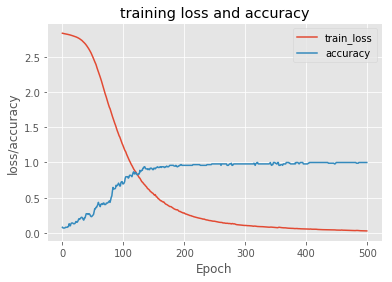

In [16]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,500),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,500),H.history["accuracy"],label="accuracy")

plt.title("training loss and accuracy")
plt.xlabel('Epoch')
plt.ylabel('loss/accuracy')
plt.legend(loc='upper right')